## Movie Run Times 

### Normmality Testing 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

For the first example, we will be working with movie runtime data from the population of all movies released in theaters in the US between 2000-2020.  We will filter for these years, and also drop any movies that have a null value for runtime.

In [5]:
# Load the data
movie_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSRzwOVZswzLMacwVwQJLB4WnDZIy46gxMxZzGtJs0FKCLhwXDb8kUI1wmo9-Nll0oo1EpgjFbBoUEV/pub?output=csv"

df = pd.read_csv(movie_url, index_col = 0, parse_dates=['release_date'])
df = df[(df['release_date'] > "2000") * (df['release_date']<"2020")]
df = df.dropna(subset = ['runtime'])
df.head(5)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
id,,,,,,,,,,,,,,,,,,,,,
1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2015-02-20,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,2004-08-06,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,2014-10-10,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,2012-03-09,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2009-02-05,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


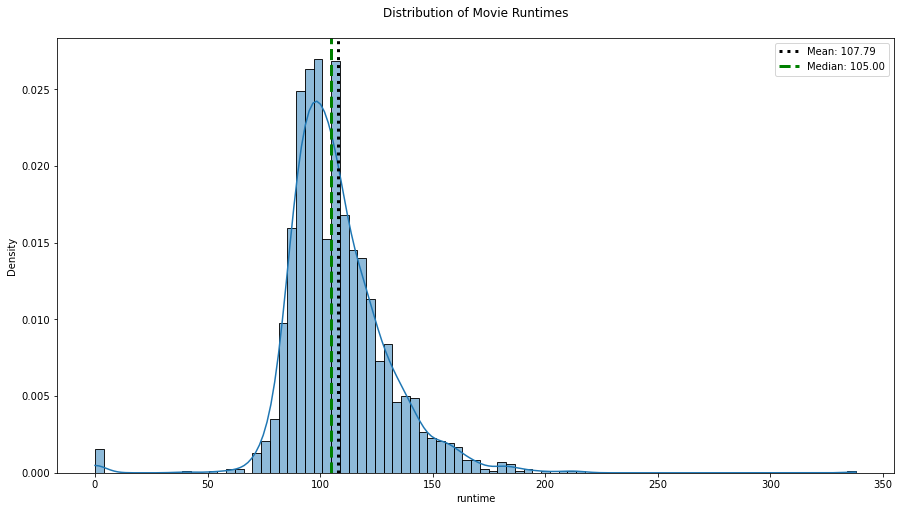

In [9]:
# Visualize teh distribution of Movie runtimes:

# Slice out data and calc stats
data = df['runtime'].copy()
mean = np.mean(data)
med = np.median(data)

# Make figure and plot histogram
fig, ax = plt.subplots(figsize=(15,8));
sns.histplot(x=data, kde=True, ax=ax, stat='density');
ax.set_title('Distribution of Movie Runtimes\n');

# Annotate mean and median
ax.axvline(mean,ls=':', color='black', lw=3, label =f"Mean: {mean:.2f}");
ax.axvline(med,ls='--', color='green', lw=3, label =f"Median: {med:.2f}");
ax.legend();

In [10]:
#  Normality test to confirm that the distribution is not normal - even though it is evident visually:

# The data was previously defined as data = df['runtime'].copy()

result = stats.normaltest(data)

print(result)

# Is the p-value less than 0.05?

result.pvalue < .05

NormaltestResult(statistic=498.6206359702571, pvalue=5.319914071356255e-109)


True

## ***Example: Female Height***

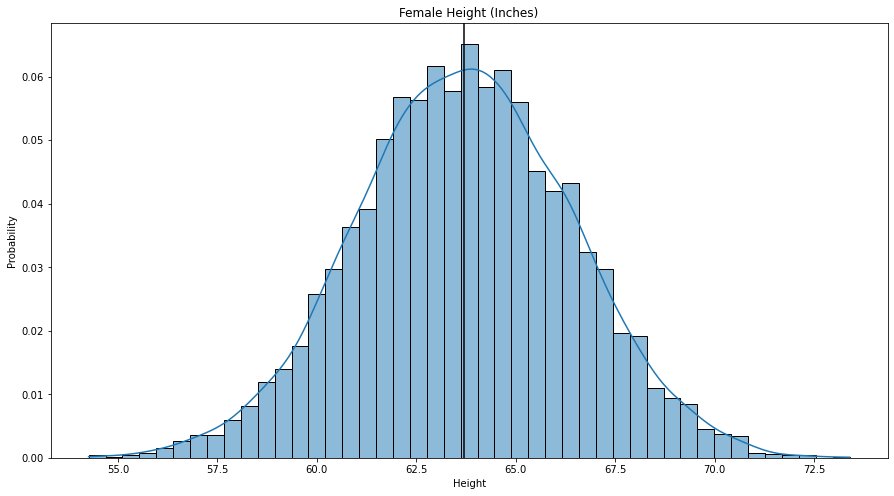

In [14]:
fh = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv')
males = fh.loc[fh['Gender']=='Male'].copy()
females = fh.loc[fh['Gender']=='Female'].copy()

# Female height with kde line:

fig, ax = plt.subplots(figsize=(15,8));
ax = sns.histplot(x=females['Height'],stat='probability',kde=True)
ax.axvline(females['Height'].mean(), color='k')
ax.set_title("Female Height (Inches)");

In [16]:
result = stats.normaltest(females['Height'])
print(result)

# is the p-value less than 0.05?
result.pvalue < .05

NormaltestResult(statistic=0.921020536662115, pvalue=0.6309616036255834)


False

it is essential to know how the null hypothesis is defined to be able to interpret what the results mean for your data. 0.05 is the most common cutoff for determining significance (alpha). 

If alpha = 0.05, 

A p-value less than 0.05 means reject null hypothesis (accept alternative hypothesis).
A p-value greater than 0.05 means accept the null hypothesis.
